In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision
from PIL import Image

from torch.utils.data import DataLoader
from load_data import FacesDataset
import json
from display_functions import *


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


There are 128 images in the batch


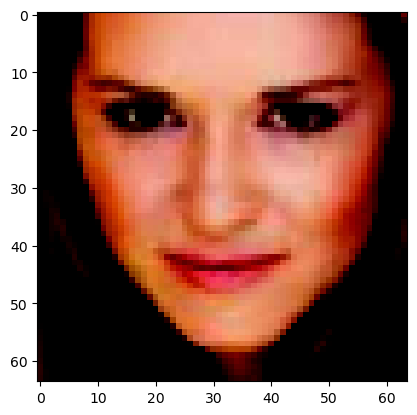

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


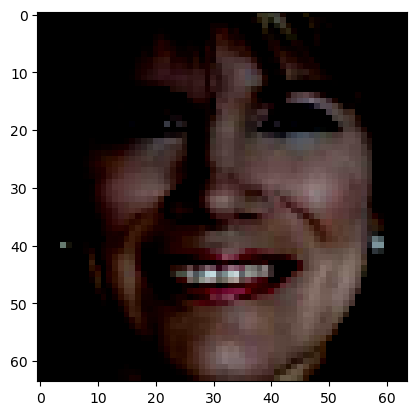

In [2]:
## Display a sample young old pair (note they are in no way related)

display_young_old_(batch_idx = 0, sample_idx = 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


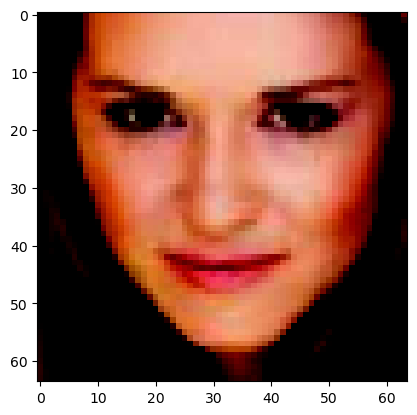

In [10]:
model = torch.load('models/conditional_gan_gen_epoch199expconditional_baseline', map_location=torch.device('cpu'))
model.eval()
sample_young = generate_sample_image(0, 3)
plt.imshow(sample_young.permute(1, 2, 0))
plt.show()

sample_young = sample_young[np.newaxis,:]

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    print("GPU unavailable, using CPU instead")
    device = torch.device("cpu")

output = model(device, sample_young)
output = output.detach().cpu().numpy()
output = np.squeeze(output) 
output = np.transpose(output, (1, 2, 0))

plt.imshow(output)
plt.show()



In [5]:
print(sample_young.shape)
sample_young = sample_young[np.newaxis,:]
print(sample_young.shape)

torch.Size([3, 64, 64])
torch.Size([1, 3, 64, 64])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


GPU unavailable, using CPU instead


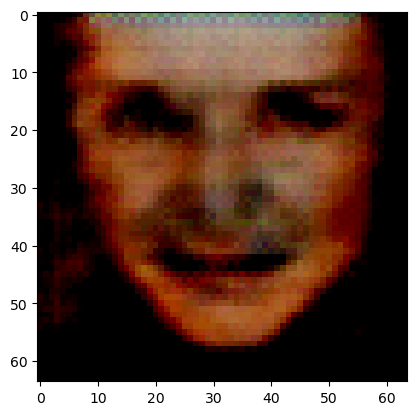

In [6]:
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    print("GPU unavailable, using CPU instead")
    device = torch.device("cpu")

output = model(device, sample_young)
output = output.detach().cpu().numpy()
output = np.squeeze(output) 
output = np.transpose(output, (1, 2, 0))

plt.imshow(output)
plt.show()